**Linear Regression**

In [53]:
# kissa zahra  i210572  Deep learning Assignment 01    -  Linear Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def read_and_preprocess_data(filepath):
  # reading csv file
  data = pd.read_csv(filepath)

  # extracting data
  X = data[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']].values
  Y = data['Sales ($)'].values

  # z-score normalization for more accuracy
  def mean_normalization(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)  #standard deviation for normalization
    return (X - mean) / std

  X_normalized = mean_normalization(X)   #normalized values

  # since x0 = 1, so we will add that as the first column
  X_normalized = np.hstack([np.ones((X_normalized.shape[0], 1)), X_normalized])

  return X_normalized, Y


In [54]:
# linear regression
class LinearRegression:

  def __init__(self, alpha=0.01, max_iters=1000, threshold=1e-6):

    self.weights = None  #weights (theta values)
    self.alpha = alpha  # learning r
    self.max_iters = max_iters  #max iterations of gradient descent
    self.threshold = threshold  #stopping criterion

  def train(self, X, Y, print_loss_iter=100):

    m, n = X.shape # will give you the dimension of the aaray

    # initialize weights (theta values) with random values
    self.weights = np.random.randn(n)

    loss_history = []

    for i in range(self.max_iters):

      predictions = X.dot(self.weights)  # linear model prediction (y' = theta0 + theta1*x1 + ...)
      errors = predictions - Y  # differnce b/w predicted and actual values

      gradient = (1/m) * X.T.dot(errors)  #gradient cal formula

      # updating weights using gradient descent
      self.weights -= self.alpha * gradient

      #  Mean Squared Error (Loss function)
      loss = (1/(2*m)) * np.sum(errors ** 2)
      loss_history.append(loss)

      if i % print_loss_iter == 0:
        print(f"Iteration {i}, Loss: {loss}")

      # convergence based on loss threshold, difference should be less than or equal to threshold
      if i > 0 and abs(loss_history[-1] - loss_history[-2]) < self.threshold:
        print(f"Convergence reached @ iteration {i}")
        break  # if it converges so break

    self.plot_loss(loss_history)

  def predict(self, X):
    return X.dot(self.weights)  #predict values based on learned weights

  def get_weights(self):
    return self.weights  #model weights after training, these are the weights of theta values

  def plot_loss(self, loss_history):
    plt.plot(loss_history)
    plt.xlabel('Iterations')
    plt.ylabel('Loss (MSE)')
    plt.title('Loss History')
    plt.show()

  def calculate_accuracy(self, Y_test, predictions):
    #accuracy by comparing predicted and actual values
    mse = np.mean((predictions - Y_test) ** 2)
    accuracy = 100 - (mse / np.mean(Y_test ** 2) * 100)
    return accuracy


def read_and_preprocess_data(filepath):
  # reading csv file
  data = pd.read_csv(filepath)

  # extracting data
  X = data[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']].values
  Y = data['Sales ($)'].values

  # z-score normalization for more accuracy
  def mean_normalization(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)  #standard deviation for normalization
    return (X - mean) / std

  X_normalized = mean_normalization(X)   #normalized values

  # since x0 = 1, so we will add that as the first column
  X_normalized = np.hstack([np.ones((X_normalized.shape[0], 1)), X_normalized])

  return X_normalized, Y

Iteration 0, Loss: 150.10486380799836
Iteration 100, Loss: 20.63054008365945
Iteration 200, Loss: 4.098719090007283
Iteration 300, Loss: 1.8032505298759387
Iteration 400, Loss: 1.4697027501815634
Iteration 500, Loss: 1.4199030064765816
Iteration 600, Loss: 1.4123096775798327
Iteration 700, Loss: 1.4111255794560418
Convergence reached @ iteration 779


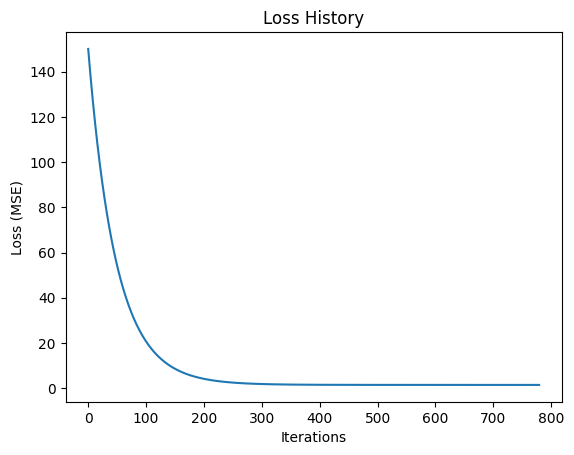

Mean Squared Error on Test Set: 2.7855946602437953
Model Accuracy on Test Set: 98.73%
Trained model weights: [14.04558867  4.04285297  2.66150903 -0.01443528]


In [55]:
# Training and evaluateing the model
def train_and_evaluate(filepath):
  X, Y = read_and_preprocess_data(filepath)

  # splitting the data (80% training, 20% testing)
  split_index = int(0.8 * len(X))
  X_train, X_test = X[:split_index], X[split_index:]
  Y_train, Y_test = Y[:split_index], Y[split_index:]

  # initialize the model
  model = LinearRegression(alpha=0.01, max_iters=1000)

  # Train the model
  model.train(X_train, Y_train, print_loss_iter=100)

  # Predicting
  predictions = model.predict(X_test)

  mse = np.mean((predictions - Y_test) ** 2)
  print(f"Mean Squared Error on Test Set: {mse}")

  accuracy = model.calculate_accuracy(Y_test, predictions)
  print(f"Model Accuracy on Test Set: {accuracy:.2f}%")

  return model


#reading data from the file
model = train_and_evaluate('/content/Advertising Budget and Sales.csv')
print('Trained model weights:', model.get_weights())

**Logistic Regression**

In [56]:
# kissa zahra  i210572  Deep learning Assignment 01    -  Logistic Regression

import numpy as np
import pandas as pd

# Logistic Regression
class LogisticRegression:
  def __init__(self, alpha=0.01, max_iters=1000, threshold=1e-6):
    self.alpha = alpha
    self.max_iters = max_iters
    self.threshold = threshold
    self.weights = None

  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))  # sigmoid function

  def loss(self, h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

  def train(self, X, y):

    self.weights = np.zeros(X.shape[1])  # initializing the weights
    for i in range(self.max_iters):
      z = np.dot(X, self.weights)  # will the linear combination of weights and features
      h = self.sigmoid(z)  #applying the sigmoid on linear combination to get the predicted probabilities for each example

      gradient = np.dot(X.T, (h - y)) / y.size  #gradient formula

      self.weights -= self.alpha * gradient

        # convergence contidion
      if np.linalg.norm(gradient) < self.threshold:
        break

  def predict_proba(self, X):  #predicting whether the sample x belongs to the postive class (1) or not
    return self.sigmoid(np.dot(X, self.weights))

  def predict_class(self, X):
    return self.predict_proba(X) >= 0.5  #if the probability is 0.5 or higher so it belong to positive class (1)

  def get_weights(self):
    return self.weights

In [57]:
#data cleaning and normalization
def clean_data(df):
  df = df.dropna()  #drop rows with missing values
  X = df.drop(columns='class')    #extract features and target
  y = df['class']
    #normalizing the cols
  X = (X - X.mean()) / X.std() #using mean deviation
  return X, y


def one_vs_all_logistic_regression(X, y, classes, alpha=0.01, max_iters=1000):
  models = {}  #dictionary to store trained models

  for cls in classes:
    print(f"Training model for class {cls}")
    y_binary = np.where(y == cls, 1, 0)  # Convert to binary classification 0 and 1
    #if its that row of that class so equal to 1, else equal to 0
    model = LogisticRegression(alpha=alpha, max_iters=max_iters)
    model.train(X, y_binary)
    models[cls] = model  #store the trained model

  return models

def predict_one_vs_all(models, X):
  predictions = {}
  for cls, model in models.items():
    predictions[cls] = model.predict_proba(X)  # will look at the probability jis ki waja sey uska model miley

  #return the class with the highest probability
  predicted_classes = []
  for i in range(X.shape[0]):
    class_probabilities = {cls: predictions[cls][i] for cls in predictions} # dictionary of class labels and their probabilities
    predicted_classes.append(max(class_probabilities, key=class_probabilities.get)) #finds class label with the highest predicted probability

  return np.array(predicted_classes)


In [58]:
def train_and_evaluate(filename):
        #Load and clean the dataset
  df = pd.read_csv(filename)

        #Encode the target labels (class column) as integers
  df['class'] = df['class'].astype('category').cat.codes

      #Define class labels
  class_labels = df['class'].unique()

  #Clean data by removing the empty values and normalizing the features to standardize their range
  X, y = clean_data(df)

    #splitting the data set and the first 80% will go for training
  mask = np.random.rand(len(X)) < 0.8
  X_train, X_test = X[mask], X[~mask]
  y_train, y_test = y[mask], y[~mask]

  #passing X_train and y_train for training
  models = one_vs_all_logistic_regression(X, y, class_labels, alpha=0.01, max_iters=1000)

 #Printing the weights for each class model
  for cls, model in models.items():
    print(f"Weights for class {cls}: {model.get_weights()}")

  #predicting on test set and evaluate accuracy
  predictions = predict_one_vs_all(models, X_test)
  accuracy = (predictions == y_test).mean() * 100
  print(f"Accuracy on test set: {accuracy:.2f}%")


filename = '/content/vehicle.csv'  #File path
train_and_evaluate(filename)

Training model for class 2
Training model for class 1
Training model for class 0
Weights for class 2: [ 0.28701125  0.09815131  0.096458   -0.3101141  -0.01676524  0.45828116
 -0.30024173  0.48129097 -0.21974731  0.53245149 -0.2779297  -0.26129516
 -0.102026    0.03498985 -0.02060078 -0.14406028  0.00504137  0.23174684]
Weights for class 1: [-0.07367103 -0.12841574  0.37104529  0.3161474  -0.45262794  0.0955095
  0.20835426 -0.18475351  0.22506973 -0.37029406  0.03226398  0.15042865
 -0.0995594  -0.62219156  0.29613741  0.32836271 -0.36524441  0.16537663]
Weights for class 0: [-0.20110793  0.03671831 -0.4332058  -0.01780595  0.42100189 -0.57126209
  0.09095415 -0.30514315 -0.00618882 -0.14070711  0.20711928  0.10169372
  0.18784843  0.49199723 -0.25345181 -0.14602124  0.3659095  -0.34921181]
Accuracy on test set: 82.74%
